In [2]:
import pandas as pd
import numpy as np


import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
#data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'


In [4]:
#!wget $data 

In [5]:
df = pd.read_csv("car_fuel_efficiency.csv")
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


columns_to_use = ['engine_displacement',
'horsepower',
'vehicle_weight',
'model_year',
'fuel_efficiency_mpg']

df = df[columns_to_use]

In [6]:
df.columns = df.columns.str.lower().str.replace(' ', '_' )

In [7]:
df.dtypes

engine_displacement      int64
num_cylinders          float64
horsepower             float64
vehicle_weight         float64
acceleration           float64
model_year               int64
origin                  object
fuel_type               object
drivetrain              object
num_doors              float64
fuel_efficiency_mpg    float64
dtype: object

In [8]:
df.describe().round(2)

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,num_doors,fuel_efficiency_mpg
count,9704.00,9222.00,8996.00,9704.00,8774.00,9704.00,9202.00,9704.00
mean,199.71,3.96,149.66,3001.28,15.02,2011.48,-0.01,14.99
std,49.46,2.00,29.88,497.89,2.51,6.66,1.05,2.56
min,10.00,0.00,37.00,952.68,6.00,2000.00,-4.00,6.20
25%,170.00,3.00,130.00,2666.25,13.30,2006.00,-1.00,13.27
50%,200.00,4.00,149.00,2993.23,15.00,2012.00,0.00,15.01
75%,230.00,5.00,170.00,3334.96,16.70,2017.00,1.00,16.71
max,380.00,13.00,271.00,4739.08,24.30,2023.00,4.00,25.97


## EDA
Look at the fuel_efficiency_mpg variable. Does it have a long tail?

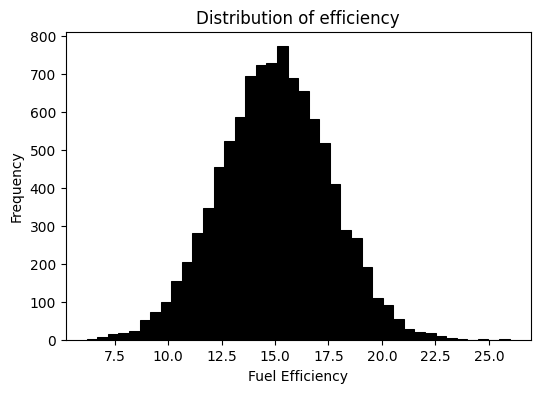

In [9]:
plt.figure(figsize=(6, 4))

sns.histplot(df.fuel_efficiency_mpg, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Fuel Efficiency')
plt.title('Distribution of efficiency')

plt.show()

**No Long Tail**

In [108]:
#Checking missing values
df.isnull().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

In [11]:
df.describe().round(2)

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,num_doors,fuel_efficiency_mpg
count,9704.00,9222.00,8996.00,9704.00,8774.00,9704.00,9202.00,9704.00
mean,199.71,3.96,149.66,3001.28,15.02,2011.48,-0.01,14.99
std,49.46,2.00,29.88,497.89,2.51,6.66,1.05,2.56
min,10.00,0.00,37.00,952.68,6.00,2000.00,-4.00,6.20
25%,170.00,3.00,130.00,2666.25,13.30,2006.00,-1.00,13.27
50%,200.00,4.00,149.00,2993.23,15.00,2012.00,0.00,15.01
75%,230.00,5.00,170.00,3334.96,16.70,2017.00,1.00,16.71
max,380.00,13.00,271.00,4739.08,24.30,2023.00,4.00,25.97


## Prepare and split the dataset
- Prepare and split the dataset
- Shuffle the dataset (the filtered one you created above), use seed 42.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.

In [12]:
np.random.seed(42)

n = len(df)


n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)


idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [13]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train_orig = df_train.fuel_efficiency_mpg.values
y_val_orig = df_val.fuel_efficiency_mpg.values
y_test_orig = df_test.fuel_efficiency_mpg.values

#y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
#y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
#y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

y_train = (df_train.fuel_efficiency_mpg.values)
y_val = (df_val.fuel_efficiency_mpg.values)
y_test = (df_test.fuel_efficiency_mpg.values)

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [14]:
y_val.shape

(1940,)

In [15]:
df_train.iloc[10]

engine_displacement                  240
num_cylinders                        2.0
horsepower                         159.0
vehicle_weight               2916.987921
acceleration                        16.3
model_year                          2001
origin                              Asia
fuel_type                       Gasoline
drivetrain             Front-wheel drive
num_doors                            1.0
Name: 10, dtype: object

## Linear Model for 1 Row($x$)

- We need to combine above to get to predict its target
    
$$
g(x_i) = w_0 + w_1xi_1 + w_2x_2 +w_nx_n
$$

$$
g(x_i) = w_0 + \sum_{j=0}^{3-1} w_j x_{ij}
$$
Where:
- $w_0$ is the bias term (prediction we make without knowing anything about the car)
- $w_j$ are the weights for each feature  
- $xi_j$ are the feature values for the i-th data point  
- $n$ is the number of features


***LETS IMPLEMENT***


In [16]:
#columns_to_use = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']

#xi = df_train[columns_to_use].loc[10].values
xi = [453,11,86]
xi

[453, 11, 86]

In [17]:
xi = [453,11,86]
w0 = 7.17
w = [0.01,0.04,0.002]

In [18]:
def linear_regression(xi):
    n = len(xi)

    pred = w0

    for j in range(n):
        pred = pred + w[j] * xi[j]
        
    return pred

In [19]:
linear_regression(xi)

12.312

In [20]:
#np.expm1(y_train[10])

### Linear Model as a Vector For 1 Row! 

- So basically we did a dot product operation above
- Remember if :
  - $w = [w_1,w_2,w_3]$ and $xi = [xi_1,xi_2,xi_3]$
  - $w.xi = w_1.xi_1 + w_2.xi_2 + w_3.xi_3$

$$
g(x_i) = w_0 + \sum_{j=0}^{3-1} w_j . x_{ij}
$$

$$
= w_0 + w_j . x_i^T
$$


In [21]:
def dot(xi,w):
    n = len(xi)
    
    res = 0.0

    for j in range (n):
        res = res + xi[j] * w[j]

    return res

In [22]:
def linear_regression(xi):        
    return w0 + dot(xi,w)

To make this even simpler,
-
- we want our $w_o$ to be with $w$
- lets assume that in our car features there is a feeature that is 1
- you see multiplying it by $w_0$ wouldnt change anything

In [23]:
w_new = [w0] + w

In [24]:
xi,w0,w,w_new

([453, 11, 86], 7.17, [0.01, 0.04, 0.002], [7.17, 0.01, 0.04, 0.002])

In [25]:
def linear_regression(xi): 
    xi = [1] + xi
    return dot(xi,w_new)

In [26]:
linear_regression(xi)

12.312

In [27]:
df_train.isnull().sum()

engine_displacement      0
num_cylinders          307
horsepower             429
vehicle_weight           0
acceleration           551
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              289
dtype: int64

## Linear Model for X

$$
\underbrace{
X =
\begin{bmatrix}
1 & x_{11} & x_{1n} \\
1 & x_{21} & x_{2n} \\
1 & x_{31} & x_{3n} \\
1 & x_{n1} & x_{nn}
\end{bmatrix}
}_{\text{Input matrix}}
\quad
\underbrace{
\mathbf{w} =
\begin{bmatrix}
w_0 \\
w_1 \\
\vdots \\
w_n
\end{bmatrix}
}_{\text{Weights vector}}
\quad \Rightarrow \quad
\underbrace{
\mathbf{y} =
\begin{bmatrix}
x_1^T \mathbf{w} \\
x_2^T \mathbf{w} \\
x_3^T \mathbf{w} \\
\vdots \\
x_n^T \mathbf{w}
\end{bmatrix}
= X\mathbf{w}
}_{\text{Predicted outputs}}
$$

**Note:**  
- Transpose is to make colums rows
- This actualy looks like matrix vector multiplication $Xw$
- Each $x_i^T$ represents the *i-th row* of matrix $X$.  
- The **first column** of $X$ contains all **1’s**, ensuring that $w_0$ acts as the **bias term** in the model.  
- Therefore, for each sample $i$:

$$
y_i = x_i^T \mathbf{w} = 1\cdot w_0 + x_{i1}w_1 + x_{i2}w_2 + \ldots + x_{in}w_n
$$


In [28]:
xi = [453,11,86]
w0 = 7.17
w = [0.01,0.04,0.002]
w_new = [w0] + w

In [29]:
x1  = [1, 148, 24, 1385]
x2  = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X = np.array(X)

In [30]:
def linear_regression(X):
    return X.dot(w_new)

In [31]:
linear_regression(X)

array([12.38 , 13.552, 12.312])

## Training a Machine Model

<details>
    <summary>Derivation of Normal Equation (click to expand)</summary>
Basically our 
model = predicted value which we will want to be close to actual value  

$$
g(X) = X\mathbf{w} \approx \mathbf{y}
$$


we dont have w we need to find a way to get w...
#### When \(X\) is not invertible (more rows than columns)
$$
X\mathbf{w} = \mathbf{y},
$$

lets say x is invertable and it exist

If \(X\) is square and invertible, multiply both sides by \(X^{-1}\):
$$
X^{-1} (X\mathbf{w}) = X^{-1}\mathbf{y} \quad\Rightarrow\quad \mathbf{w} = X^{-1}\mathbf{y}.
$$

#### When \(X\) is not invertible (more rows than columns)

In most real-world datasets, the matrix $X$ has **many rows** (samples) and **few columns** (features).  
Thus, $X$ is *not square*, and its inverse $X^{-1}$ **does not exist**.

We start from the model:
$$
X\mathbf{w} \approx \mathbf{y}
$$

To find an approximate solution for $\mathbf{w}$,  
we multiply both sides by $X^{T}$:
$$
X^{T}X\mathbf{w} = X^{T}\mathbf{y}
$$

Here:
- $X^{T}X$ is called the **Gram matrix**.
- It is always **square** (of size $(n+1) \times (n+1)$) even when $X$ is not.
- If $X^{T}X$ is **invertible**, we can safely multiply both sides by its inverse:

$$
(X^T X)^{-1} X^T X w = (X^T X)^{-1} X^T y
$$

Simplifying:

$$
w = (X^T X)^{-1} X^T y
$$


This gives the **least squares solution**, minimizing the total squared error:
$$
\min_{\mathbf{w}} \| X\mathbf{w} - \mathbf{y} \|^2
$$

**Summary:**
- $X^{-1}$ does **not** exist when $X$ is rectangular.  
- $(X^{T}X)^{-1}$ usually **does exist**, since $X^{T}X$ is square (the Gram matrix).  
- This approach is the foundation of the **Ordinary Least Squares (OLS)** solution.
</details>

$$
w = (X^T X)^{-1} X^T y
$$

In [32]:
y = [1000,20000,15000,25000,10000,20000,15000,25000,12000]
X = [
    [148,  24, 1385],
    [132,  25, 2031],
    [453,  11,   86],
    [158,  24,  185],
    [172,  25,  201],
    [413,  11,   86],
    [ 38,  54,  185],
    [142,  25,  431],
    [453,  31,   86],
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [33]:
# we need to include our bias term (1)
ones = np.ones(X.shape[0])
#ones

In [34]:
# adding ones to X
X = np.column_stack([ones,X])

In [35]:
# Lets calculate the grand matrix XtX
XTX = X.T.dot(X)

In [36]:
# Lets calculate the Inverse of grand matrix XtX
XTX_inv = np.linalg.inv(XTX)

In [37]:
## A quick check xtx * xtxinv will give us (I)dentity matrix
np.round(XTX.dot(XTX_inv))

array([[ 1., -0.,  0.,  0.],
       [-0.,  1.,  0., -0.],
       [-0.,  0.,  1.,  0.],
       [-0., -0.,  0.,  1.]])

In [38]:
#xtxinverse . xTranspose . y
w_full = XTX_inv.dot(X.T).dot(y)

In [39]:
w0 = w_full[0]
w = w_full[1:]

In [40]:
w0,w

(np.float64(29092.79335882912),
 array([ -21.35039359, -236.68170686,   -4.14250804]))

<details> 
<summary>Interpretion of above result</summary>
Some might be negative ...
- Means that for extra(maybe horsepower(first feature in w[-21.35039359]),
   - Price goes down

</details>


In [41]:
X = [
    [148,  24, 1385],
    [132,  25, 2031],
    [453,  11,   86],
    [158,  24,  185],
    [172,  25,  201],
    [413,  11,   86],
    [ 38,  54,  185],
    [142,  25,  431],
    [453,  31,   86],
]

X = np.array(X)

In [42]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    #XTX_inv = np.linalg.pinv(XTX)

    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [43]:
train_linear_regression(X,y)

(np.float64(29092.79335882912),
 array([ -21.35039359, -236.68170686,   -4.14250804]))

## Car Fuel efficiency Baseline Model

In [44]:
df_train.dtypes

engine_displacement      int64
num_cylinders          float64
horsepower             float64
vehicle_weight         float64
acceleration           float64
model_year               int64
origin                  object
fuel_type               object
drivetrain              object
num_doors              float64
dtype: object

In [45]:
base = ['engine_displacement',
'horsepower',
'vehicle_weight',
'model_year']
##df_train[base]

In [46]:
##extracting as numpy array
X_train = df_train[base].values

In [47]:
train_linear_regression(X_train,y_train)

(np.float64(nan), array([nan, nan, nan, nan]))

This is hat happens when you have missing values. Lets treat

In [48]:
df_train[base].isnull().sum()

engine_displacement      0
horsepower             429
vehicle_weight           0
model_year               0
dtype: int64

In [49]:
X_train = df_train[base].fillna(0)

- Fill with 0 - not really a good process, because this eliminates the feature xi.wi -> 0.wi =0
- Can fill with mean

In [50]:
w0,w=train_linear_regression(X_train,y_train)

In [51]:
##Lets predict y = bias term + x.w 
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

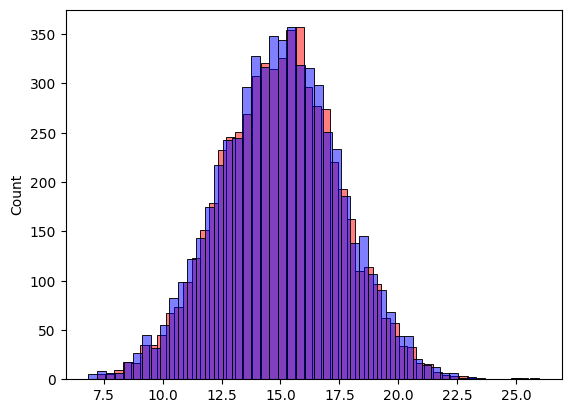

In [52]:
sns.histplot(y_pred, color='red', alpha=0.5, bins = 50)
sns.histplot(y_train, color='blue', alpha=0.5, bins = 50)

base = ['engine_displacement',
'horsepower',
'vehicle_weight',
'model_year']

X_train = df_train[base].fillna(0)

w0,w=train_linear_regression(X_train,y_train)

y_pred = w0 + X_train.dot(w)
##df_train[base]

## RMSE: Model Eval!

### Root Mean Squared Error (RMSE)

$$
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} \left(g(x_i) - y_i\right)^2}
$$

<details>
<summary><b> Explanation </summary>

1. **Prepare the data**  
   - You have two sets of values:  
     - $g(x_i)$: predicted values  
     - $y_i$: actual values  
   - Both should have the same length $n$.

2. **Compute the residuals (errors)**  
   $$
   e_i = g(x_i) - y_i
   $$

3. **Square the residuals**  
   $$
   e_i^2 = (g(x_i) - y_i)^2
   $$  
   Squaring removes negative signs and penalizes large errors.

4. **Compute the mean of squared residuals**  
   $$
   \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} e_i^2
   $$

5. **Take the square root to get RMSE**  
   $$
   \text{RMSE} = \sqrt{\text{MSE}} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (g(x_i) - y_i)^2}
   $$

6. **Interpretation**  
   - RMSE gives the **average prediction error** in the same units as the target variable $y$.  
   - A **lower RMSE** indicates a better fit.


RMSE measures the **average magnitude of the prediction error**.  
It penalizes large errors more than smaller ones due to the squaring operation.  
A **lower RMSE** indicates better model performance.

</details>


In [53]:
def rmse(y,y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()    
    return np.sqrt(mse)

In [54]:
rmse(y_train,y_pred)

np.float64(0.5202614265099076)

### Evaluate Model
- 60% Train | 20% Validate (and use RMSE) | 20% Test

In [55]:
base = ['engine_displacement',
'horsepower',
'vehicle_weight',
'model_year']

In [56]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [57]:
#--------------------Train---------------------------------
X_train = prepare_X(df_train)
w0,w = train_linear_regression(X_train,y_train)

#--------------------Val------------------------------------
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

In [58]:
rmse(y_val,y_pred)

np.float64(0.5173782638857467)

<Axes: ylabel='Count'>

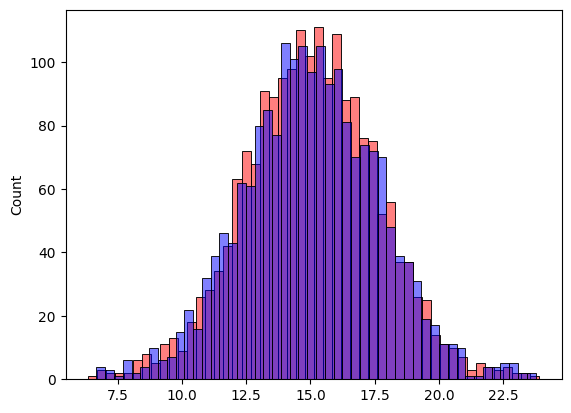

In [59]:
sns.histplot(y_pred, color='red', alpha=0.5, bins = 50)
sns.histplot(y_val, color='blue', alpha=0.5, bins = 50)

## Feature Engineering

In [60]:
df_train

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors
0,220,3.0,144.0,2535.887591,18.7,2009,USA,Gasoline,All-wheel drive,2.0
1,160,2.0,141.0,2741.170484,14.3,2019,Asia,Diesel,Front-wheel drive,2.0
2,230,3.0,155.0,2471.880237,NaN,2017,Asia,Diesel,Front-wheel drive,2.0
3,150,3.0,206.0,3748.164469,15.5,2015,USA,Gasoline,All-wheel drive,1.0
4,300,4.0,111.0,2135.716359,16.9,2006,USA,Gasoline,All-wheel drive,NaN
...,...,...,...,...,...,...,...,...,...,...
5819,260,5.0,139.0,2606.972984,15.9,2009,USA,Gasoline,All-wheel drive,-1.0
5820,280,4.0,132.0,4004.214323,12.8,2014,Europe,Diesel,Front-wheel drive,2.0
5821,210,3.0,152.0,2500.175687,16.4,2020,Europe,Gasoline,Front-wheel drive,0.0
5822,250,6.0,154.0,2254.313245,13.3,2002,Asia,Gasoline,Front-wheel drive,2.0


In [61]:
#Get the age of the cars, assuming we are at max year
(2023 - df.model_year)
# we want to use this feature in our prediction 

0       20
1       16
2        5
3       14
4       14
        ..
9699    10
9700    19
9701    15
9702    12
9703    18
Name: model_year, Length: 9704, dtype: int64

In [62]:
def prepare_X(df):
    df = df.copy()
    df['age'] = (2023 - df.model_year)
    features = base + ['age']
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [63]:
#--------------------Train---------------------------------
X_train = prepare_X(df_train)
X_train
# A column has been added only on X_train

array([[ 220.        ,  144.        , 2535.88759124, 2009.        ,
          14.        ],
       [ 160.        ,  141.        , 2741.17048439, 2019.        ,
           4.        ],
       [ 230.        ,  155.        , 2471.88023726, 2017.        ,
           6.        ],
       ...,
       [ 210.        ,  152.        , 2500.17568746, 2020.        ,
           3.        ],
       [ 250.        ,  154.        , 2254.31324473, 2002.        ,
          21.        ],
       [ 210.        ,  152.        , 2435.20360628, 2004.        ,
          19.        ]], shape=(5824, 5))

In [64]:
#--------------------Train---------------------------------
X_train = prepare_X(df_train)
w0,w = train_linear_regression(X_train,y_train)

#--------------------Val------------------------------------
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val,y_pred)
## performs Poorly

np.float64(18.762120134971493)

<Axes: ylabel='Count'>

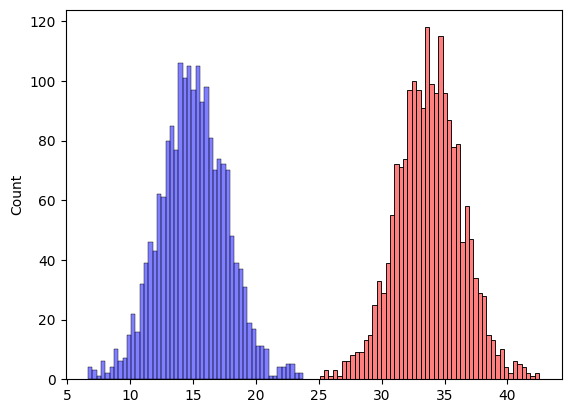

In [65]:
sns.histplot(y_pred, color='red', alpha=0.5, bins = 50)
sns.histplot(y_val, color='blue', alpha=0.5, bins = 50)
## performs Poorly

## Categorical Variables

- These are **string/object** features such as `Origin`, `Fuel_Type`, `Drivetrain`, etc.  
- Even some numeric-looking variables like `Num_Doors` are actually **categorical** (they represent types, not quantities).  

We handle categorical variables by **encoding** them into **binary (0/1) columns**, a process known as **One-Hot Encoding**.

<details>
<summary><b>💡 Why we do this (click to expand)</b></summary>

Machine learning models work with numerical inputs.  
To include categorical variables, we transform them into binary columns:  

Example:
| Fuel_Type | Fuel_Type_Petrol | Fuel_Type_Diesel | Fuel_Type_Electric |
|------------|------------------|------------------|--------------------|
| Petrol     | 1                | 0                | 0                  |
| Diesel     | 0                | 1                | 0                  |
| Electric   | 0                | 0                | 1                  |

This ensures each category is represented numerically **without implying any order**.

</details>


In [66]:
df_train.dtypes

engine_displacement      int64
num_cylinders          float64
horsepower             float64
vehicle_weight         float64
acceleration           float64
model_year               int64
origin                  object
fuel_type               object
drivetrain              object
num_doors              float64
dtype: object

In [67]:
df_train.num_doors 

0       2.0
1       2.0
2       2.0
3       1.0
4       NaN
       ... 
5819   -1.0
5820    2.0
5821    0.0
5822    2.0
5823   -1.0
Name: num_doors, Length: 5824, dtype: float64

In [68]:
#for v in [2,3,4]:
#    df_train['num_doors_%s' % v] = (df_train.num_doors == v).astype('int')

In [69]:
df_train

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors
0,220,3.0,144.0,2535.887591,18.7,2009,USA,Gasoline,All-wheel drive,2.0
1,160,2.0,141.0,2741.170484,14.3,2019,Asia,Diesel,Front-wheel drive,2.0
2,230,3.0,155.0,2471.880237,NaN,2017,Asia,Diesel,Front-wheel drive,2.0
3,150,3.0,206.0,3748.164469,15.5,2015,USA,Gasoline,All-wheel drive,1.0
4,300,4.0,111.0,2135.716359,16.9,2006,USA,Gasoline,All-wheel drive,NaN
...,...,...,...,...,...,...,...,...,...,...
5819,260,5.0,139.0,2606.972984,15.9,2009,USA,Gasoline,All-wheel drive,-1.0
5820,280,4.0,132.0,4004.214323,12.8,2014,Europe,Diesel,Front-wheel drive,2.0
5821,210,3.0,152.0,2500.175687,16.4,2020,Europe,Gasoline,Front-wheel drive,0.0
5822,250,6.0,154.0,2254.313245,13.3,2002,Asia,Gasoline,Front-wheel drive,2.0


In [70]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    #df['age'] = (2023 - df.model_year)
    #features = base + ['age']
    #features.append('age')

    for v in [2,3,4]:
        df['num_doors_%s' % v] = (df.num_doors == v).astype('int')
        features.append('num_doors_%s' % v)
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X

In [71]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])

    XTX = X.T.dot(X)
    #XTX_inv = np.linalg.inv(XTX)
    XTX_inv = np.linalg.pinv(XTX)

    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [72]:
#--------------------Train---------------------------------
X_train = prepare_X(df_train)
w0,w = train_linear_regression(X_train,y_train)

#--------------------Val------------------------------------
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val,y_pred)
## No much difference from our first

np.float64(0.5174635877516739)

<Axes: ylabel='Count'>

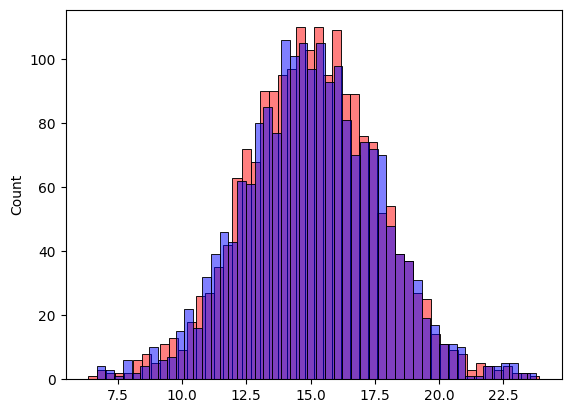

In [73]:
sns.histplot(y_pred, color='red', alpha=0.5, bins = 50)
sns.histplot(y_val, color='blue', alpha=0.5, bins = 50)
## No much difference from our first

In [74]:
# Lets look at origin
df.origin.nunique()

3

In [75]:
origins = list(df.origin.value_counts().head().index)
origins

['Europe', 'Asia', 'USA']

In [76]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    #df['age'] = (2023 - df.model_year)
    #features = base + ['age']
    #features.append('age')

    for v in [2,3,4]:
        df['num_doors_%s' % v] = (df.num_doors == v).astype('int')
        features.append('num_doors_%s' % v)

    for v in origins:
        df['origin_%s' % v] = (df.origin == v).astype('int')
        features.append('origin_%s' % v)
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X

In [77]:
#--------------------Train---------------------------------
X_train = prepare_X(df_train)
w0,w = train_linear_regression(X_train,y_train)

#--------------------Val------------------------------------
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val,y_pred)
## No much difference from our first

np.float64(0.517274792437397)

In [78]:
# Lets do for alll
df.dtypes

engine_displacement      int64
num_cylinders          float64
horsepower             float64
vehicle_weight         float64
acceleration           float64
model_year               int64
origin                  object
fuel_type               object
drivetrain              object
num_doors              float64
fuel_efficiency_mpg    float64
dtype: object

In [79]:
categorical_variables = ['drivetrain' , 'origin' , 'fuel_type']

categories = {}

for c in categorical_variables:
    categories[c] = list(df[c].value_counts().head().index)


In [80]:
categories

{'drivetrain': ['All-wheel drive', 'Front-wheel drive'],
 'origin': ['Europe', 'Asia', 'USA'],
 'fuel_type': ['Gasoline', 'Diesel']}

In [81]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    #df['age'] = (2023 - df.model_year)
    #features = base + ['age']
    #features.append('age')

    for v in [2,3,4]:
        df['num_doors_%s' % v] = (df.num_doors == v).astype('int')
        features.append('num_doors_%s' % v)

    for c, values in categories.items():
        for v in values:
            df['%s_%s' %(c, v)] = (df[c] == v).astype('int')
            features.append('%s_%s' % (c,v))
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X

In [82]:
#--------------------Train---------------------------------
X_train = prepare_X(df_train)
w0,w = train_linear_regression(X_train,y_train)

#--------------------Val------------------------------------
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val,y_pred)
## No much difference from our first

np.float64(0.5173080092838334)

## Regularization

In [83]:
def train_linear_regression_reg(X,y,r=0.01):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])

    XTX = X.T.dot(X)

    XTX = XTX + r * np.eye(XTX.shape[0])

    
    #XTX_inv = np.linalg.inv(XTX)
    XTX_inv = np.linalg.pinv(XTX)    

    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [84]:
#--------------------Train---------------------------------
X_train = prepare_X(df_train)
w0,w = train_linear_regression_reg(X_train,y_train,r=0.01)

#--------------------Val------------------------------------
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val,y_pred)
## No much difference from our first

np.float64(0.5171454845138052)

## Tuning Model

In [94]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]:
    #--------------------Train---------------------------------
    X_train = prepare_X(df_train)
    w0,w = train_linear_regression_reg(X_train,y_train,r)
    
    #--------------------Val------------------------------------
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val,y_pred)
    ## No much difference from our first

    print(r, w0, score)

0.0 12.329208987834397 0.5173080092838334
1e-05 12.32838181001092 0.5173077985645423
0.0001 12.32055705779258 0.5173059063350928
0.001 12.24707662075348 0.5172874630449757
0.01 11.554053851688014 0.5171454845138052
0.1 7.378822210943514 0.517475855673115
1 1.599356016837956 0.521273531092439
10 0.1810907877919895 0.522785068823662


## Final Model Training and Testing

- We trained on train data and checked performance on validation data using RMSE.  
- Now we’ll combine train + validation to get more data for training.  
- Then we’ll test the final model on the test data to check real performance.


In [87]:
df_full_train = pd.concat([df_train,df_val])

In [90]:
df_full_train = df_full_train.reset_index(drop=True)

In [92]:
X_full_train = prepare_X(df_full_train)

In [93]:
y_full_train = np.concatenate([y_train,y_val])

In [95]:
w0,w = train_linear_regression_reg(X_full_train,y_full_train,r=0.01)

In [96]:
#--------------------Val------------------------------------
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
rmse(y_test,y_pred)

np.float64(0.5162441241729383)

## Make Predictions

Now we’ll **use our trained model** to predict the **fuel_efficiency_mpg** of a car based on input features.  
We’ll provide new feature values, and the model will output the **predicted mileage**.

<details>
<summary><b>🌐 Real-World Usage (click to expand)</b></summary>

In a real application, this model would be deployed on a **website or app**.  
Users would fill in car details (like year, fuel type, engine size, etc.),  
and the system would send those inputs to our model.  

The model would then **predict the car’s mileage** and return the result instantly to the user.

</details>


In [98]:
car = df_test.iloc[20]
car

engine_displacement                  160
num_cylinders                        4.0
horsepower                         125.0
vehicle_weight               3317.042046
acceleration                        19.0
model_year                          2018
origin                            Europe
fuel_type                         Diesel
drivetrain             Front-wheel drive
num_doors                           -1.0
Name: 20, dtype: object

In [100]:
df_small = pd.DataFrame([car])
df_small

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors
20,160,4.0,125.0,3317.042046,19.0,2018,Europe,Diesel,Front-wheel drive,-1.0


In [101]:
X_small = prepare_X(df_small)

In [106]:
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]
y_pred

np.float64(13.335207658461174)

In [107]:
y_test[20]

np.float64(12.77905629316582)